# Plot scan

In [94]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from itertools import product
import seaborn as sns
import os
pd.option_context('display.max_columns', -1)

from helper import getLLPs,getJets,getDisplacedJets,getModelDict,splitModels
from ATLAS_data.effFunctions import eventEff,vertexEff

delphesDir = os.path.abspath("./DelphesLLP")
os.environ['ROOT_INCLUDE_PATH'] = os.path.join(delphesDir,"external")

import ROOT

ROOT.gSystem.Load(os.path.join(delphesDir,"libDelphes.so"))

ROOT.gInterpreter.Declare('#include "classes/SortableObject.h"')
ROOT.gInterpreter.Declare('#include "classes/DelphesClasses.h"')
ROOT.gInterpreter.Declare('#include "external/ExRootAnalysis/ExRootTreeReader.h"')

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

In [95]:
#Load scan data
inputFile = './hs_highMC_55/Events/run_01/hs_55_tau_3.33e-02_delphes_events.root'
tau_ns = eval(inputFile.split('tau_')[1].split('_')[0])

In [96]:
f = ROOT.TFile(inputFile,'read')
tree = f.Get("Delphes")
nevts = tree.GetEntries()
totalweightPB = 0.0
lumi = 139.0*1e3
njets = {45.0 : [], 55.0 : [], 100.0 : [], 150.0 : []}
pTj = []
pTj1 = []
for ievt in range(nevts):    
    tree.GetEntry(ievt)   
    jets = getJets(tree.GenJet,pTmin=20.,etaMax=2.8)

    weightPB = tree.Event.At(0).Weight/nevts
    totalweightPB += weightPB

    for minPT in njets:
        nj = len([j for j in jets if j.PT > minPT])
        njets[minPT].append(nj)
    if len(jets) > 0:
        for j in jets:
            pTj.append(j.PT)
        pTj1.append(max([j.PT for j in jets]))
f.Close()
print(f'{nevts} Events, Total cross-section = {totalweightPB} pb')

50000 Events, Total cross-section = 331.85000610356644 pb


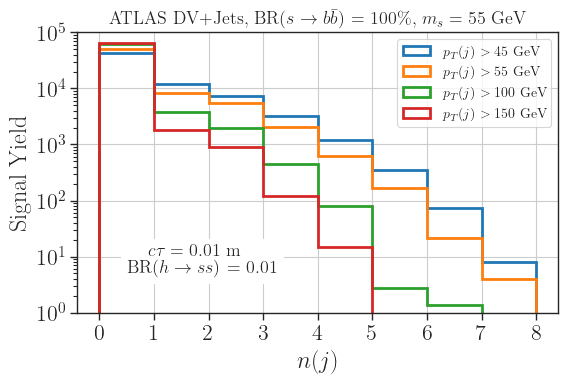

In [97]:

plt.figure(figsize=(6,4))
n = 0
nbins = np.arange(0,9,1)
xsecHiggs = 48.5
BR = 1e-2
weights = [(xsecHiggs*BR*lumi)/nevts]*nevts
for minPT,nj in njets.items():
    plt.hist(nj,bins=nbins,label=r'$p_T(j) > %1.0f$ GeV' %minPT,weights=weights,
             linewidth=2.0,histtype='step')


plt.legend(fontsize=10)
# plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$n(j)$')
plt.ylabel('Signal Yield')
# plt.tight_layout()
# plt.xlim(1e-5,1)
# plt.ylim(1e-4,1)
plt.ylim(1,1e5)
plt.xticks(nbins)
plt.grid()
plt.tight_layout()
plt.title(r'ATLAS DV+Jets, BR($s \to b\bar{b}$) = 100\%, $m_{s} = 55$ GeV', fontsize=13)
plt.text(0.5,10,r'$c\tau = %1.2f$ m\\BR($h \to ss$) = %1.2f' %(tau_ns*0.3,BR),
         fontsize=13,bbox=dict(facecolor='white', alpha=1.0),horizontalalignment='left')
plt.savefig('recastHS_nj.png')
plt.show()

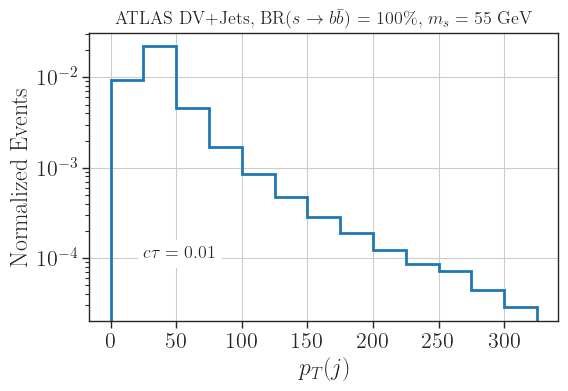

In [98]:

plt.figure(figsize=(6,4))
pjbins = np.arange(0.,350.,25.0) 
plt.hist(pTj,bins=pjbins,density=True,
             linewidth=2.0,histtype='step')

plt.yscale('log')
plt.xlabel(r'$p_T(j)$')
plt.ylabel('Normalized Events')
# plt.xlim(1e-5,1)
# plt.ylim(1e-4,1)
# plt.ylim(1,1e5)
plt.xticks(pjbins[::2])
plt.grid()
plt.tight_layout()
plt.title(r'ATLAS DV+Jets, BR($s \to b\bar{b}$) = 100\%, $m_{s} = 55$ GeV', fontsize=13)
plt.text(25.0,1e-4,r'$c\tau = %1.2f$' %(tau_ns*0.3),
         fontsize=13,bbox=dict(facecolor='white', alpha=1.0),horizontalalignment='left')
plt.savefig('recastHS_pTj.png')
plt.show()

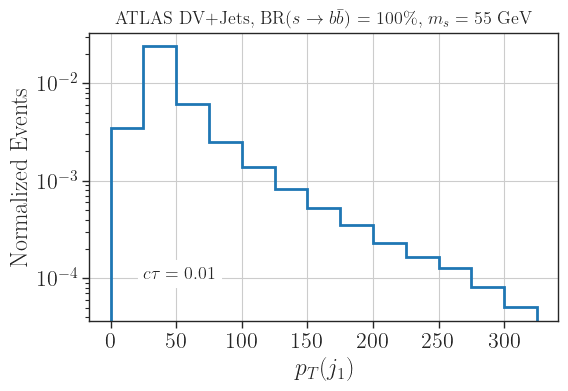

In [100]:

plt.figure(figsize=(6,4))
pjbins = np.arange(0.,350.,25.0) 
plt.hist(pTj1,bins=pjbins,density=True,
             linewidth=2.0,histtype='step')

plt.yscale('log')
plt.xlabel(r'$p_T(j_1)$')
plt.ylabel('Normalized Events')
# plt.xlim(1e-5,1)
# plt.ylim(1e-4,1)
# plt.ylim(1,1e5)
plt.xticks(pjbins[::2])
plt.grid()
plt.tight_layout()
plt.title(r'ATLAS DV+Jets, BR($s \to b\bar{b}$) = 100\%, $m_{s} = 55$ GeV', fontsize=13)
plt.text(25.0,1e-4,r'$c\tau = %1.2f$' %(tau_ns*0.3),
         fontsize=13,bbox=dict(facecolor='white', alpha=1.0),horizontalalignment='left')
plt.savefig('recastHS_pTj1.png')
plt.show()